In [1]:
pip install pycrypto

     |████████████████████████████████| 450kB 4.3MB/s 
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp36-cp36m-linux_x86_64.whl size=499939 sha256=ed1adb997d577c6fc5f33c5064ae0216a6573e7f449bb560765b4f4f14c21aa0
  Stored in directory: /root/.cache/pip/wheels/27/02/5e/77a69d0c16bb63c6ed32f5386f33a2809c94bd5414a2f6c196
Successfully built pycrypto


In [2]:
from Crypto.Cipher import Blowfish
from Crypto.Cipher import AES
from Crypto.Cipher import DES
from Crypto.Cipher import DES3
from struct import pack

In [3]:
import base64
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
f = open("/content/info.txt", "r")


In [5]:
data =f.read()

In [6]:
x=data.splitlines()


# **Cipher Processing**

## **Plain Text**

In [7]:
print("Example text : ", x[0])
print("Text length : ", len(x[0]))
print("Number of examples : ", len(x))

Example text :  thefultoncountygrandjurysaidfridayaninvestigationofatlantasrecentprimaryelectionproducednoevidencethatanyirregularitiestookplacethejuryfurthersaidintermendpresentmentsthatthecityexecutivecommitteewhichhadoverallchargeoftheelectiondeservesthepraiseandthanksofthecityofatlantaforthemannerinwhichtheelectionwasconductedtheseptemberoctobertermjuryhadbeenchargedbyfultonsuperiorcourtjudgedurwoodpyetoinvestigatereportsofpossibleirregularitiesinthehardfoughtprimarywhichwaswonbymayornominateivanallenjronlyarelativehandfulofsuchreportswasreceivedthejurysaidconsideringthewidespreadinterestintheelectionthenumberofvotersandthesizeofthiscitythejurysaiditdidfindthatmanyofgeorgiasregistrationandelectionlawsareoutmodedorinadequateandoftenambiguousitrecommendedthatfultonlegislatorsacttohavetheselawsstudiedandrevisedtotheendofmodernizingandimprovingthemthegrandjurycommentedonanumberofothertopicsamongthemtheatlantaandfultoncountypurchasingdepartmentswhichitsaidarewelloperatedandfollowgeneral

## **Blowfish**

In [8]:
blk_sz = Blowfish.block_size
key = b'Sixteen byte key' #An arbitrarily long key'
crypt_bf=[]

cipher1 = Blowfish.new(key, Blowfish.MODE_ECB)

for i in range(1000):
  padding_len = blk_sz - len(bytes(x[i], 'utf-8'))% blk_sz

  padding = [padding_len]*padding_len

  padding = pack('b'*padding_len, *padding)


  crypt_bf.append(  base64.b64encode(         cipher1.encrypt(bytes(x[i], 'utf-8') + padding)    ).decode()          )

## **AES**

In [9]:
key = b'Sixteen byte key'

crypt_aes=[]
cipher = AES.new(key, AES.MODE_ECB)

blk_sz_AES  = 16
for i in range(1000):
  padding_len = blk_sz_AES - len(bytes(x[i], 'utf-8'))% blk_sz_AES

  padding = [padding_len]*padding_len

  padding = pack('b'*padding_len, *padding)

  crypt_aes.append(  base64.b64encode(         cipher.encrypt(bytes(x[i], 'utf-8') + padding)    ).decode()          )

## **DES3**

In [10]:
key = b'Sixteen byte key'



cipher3 = DES3.new(key, DES.MODE_ECB)
crypt_des3=[]
blk_sz_DES  = 8
for i in range(1000):
  padding_len = blk_sz_DES - len(bytes(x[i], 'utf-8')) % blk_sz_DES


  padding = [padding_len]*padding_len


  padding = pack('b'*padding_len, *padding)

  
  crypt_des3.append(  base64.b64encode(         cipher3.encrypt(bytes(x[i], 'utf-8') + padding)    ).decode()          )

In [11]:
print("Blowfish ciphertext : ",crypt_bf[0])
print("Lenght of ciphertext : ",len(crypt_bf[0]))

Blowfish ciphertext :  8wKt+HNXxfnmdzUq1qB4jBTWocOpknmMi3oTy1LGmQDByX+bS/aYYTtFv+J5othDvXwxtTS0A7uCDNOMQecXF2wHig9PWSEqg5/vA27UDNumj0dZidAqIRIl4WuaDzelm1Fclm27sU0RY+RlcyWjdaT5vQiq63ny6l8y9Iu3hcviC+/fU5tYdd4ONWdjoFTt/2lN/w0En7TWieuwgB7hCi1E8ojj/m1/Q4+w/RPH/CJlcU2tFdhQ/51sKkGxbW8dIC+Y7KmRSuRDcRPJ1peUO5lQ0cHc56quc+Yr0C7o0KEYA6oYK+uk0Wf29q69G4VUmWWJ+zbjs52W7YGyNpazpeEz31VYAiBx1F4/0mmQ2RcG+eaU46Z05XG1wLdRtd0hcSg5dciZtcaDn+8DbtQM27NfkpzIHX7Qn45TF9XCkqCjd8GjxW5I4XCTx/J9Py9GV9yH9Tsr8tFSvIsQ4hJWLNnv+lYC31/VYGT/V+psOk9yXCK/8iWZioewqvvhheUGpDKIA9Fcg9QoI2SBLoIjVEHrQbMgQxABTBS6XlIPxUdT9NJF19/tE9fVDN6zqV3TRY4+smnsObb+I81h2g7XxIzzCXP0ZC1etJoCQ4j0hwqiksw/QcbxA2ZIFACAuQ4kgIBhgICxhi5sh5rGfhFUxOX5ok0QrJcHLMalvXe4zZY/rRKRLZUDeN98kKGMQhQl8V7W0UZdCTnCVDgU4yZTNpE8uAC7yapEq+T3WPKlwzxkaXo79XaxZnziFagg8F5FZgw811DuJDGkaHkE2ui/OgmmjEDBgkx/IHmNoeCxoDZHr4RB/D3LwPA3glveYm6ywwoV5N3d5vCX491SSQvIJAh2ihRekm+gXCTLG1X5t0JRCDcz5B0vRFuWih7/xlozXxuNjGM1Gvj1BSYHDl+TYr18hFaCIAOVEqagwuLKnHZEUG42KFIdaJL7guaA+3LjsUSW8+CwNua30j1Fd

In [12]:
print("Advanced Encryption Standard cipher : ",crypt_aes[0])
print("Lenght of ciphertext : ",len(crypt_aes[0]))

Advanced Encryption Standard cipher :  84FzpC4fvO8Xaymdc+iJbg8dZKX/t66+AysxlFuz+DZ+8Y3Aix9PWFsfjsaqs22NTH7DWtW3IK9mlc5sZSdBKbsKvGRD35o2pOtsPVfEP3UEPUcdcaO5BqB3A4HykLZjH9mnBwYnF61xmiwYYpdJBqUuJvw29hlrN0uFD4idetp3GSjZ0jAN+/xp+MWary5wwSkflPQRa2lgbeNtakRMrBZ4feUIjcilrq74Dl4vEcFBg8aRlsCviJK5Ay6HMcDOof2EAU/qvy0PVld432iqbl/odQemFji7jmtlohJ2T03iABuB3G9q0hstZLw6Ow1gr+hXvoQRprg8BwNJEZIFx/Z6Nxinv/lX9aYilSKe8ZV/nozWrSKt7HweBD77quEIWs1dYeikngB8boFsZm8RieDZqGtjGpl1D/9p9PXkQPYdVS6k7JgATZdLYE5kc6YOn7wyDwPLVrejexuogHrUO+g9dho6m1QGFAnITbi2TqpcdIurXnUI+o5a00hmlzHZ+dC8euPHYSTwBJU5JE6sZ5IBe4iICeIg/THVAPdJpIETGbxPthLPoVq6Ps6UJbGunOH+geHcObrX1ApxTHdcPwLR3zVI2BkpgH/kr1LyYGLhh1TUPsXQ7SWIG0fNve9o9eFATcO80s5PvRB9AqlbVlZUO0T0ioUse0MYW7Z8UKIwYF1XDLaae4JBss22jFbTmYnILuNZYlQNXNcYQDjrrdFy44OT7r4P5djJZAetV54GL0rFSUdiGSxC2tw5m4sbp0vOtdzQaAqkvV7pjBPSH2W3FO/WNUq6GMQgJa5LhXSwE4PYIIvuqnjwSZGZcFm0+3bPn6o7s5U35+DIFYrjbftLFbIIDMr2DaT/n4RH1dzfHcmrSvxSrUztH6ECWWfN3SoUzwCinZxew/AtUCklbE6KFLP102yDE+lVvx4+cfl15HQxbgEqjN83feSv5iEbe

In [13]:
print("Triple Data Encryption cipher : ",crypt_des3[0])
print("Lenght of ciphertext : ",len(crypt_des3[0]))

Triple Data Encryption cipher :  t5fZsXYEBJta2PNghJyRUWUJQRcmNO1gft1AZujH4gZIO5l0lZOcyKMWERXQu3TaGDG0Q9t1RFQdgiKyFdJMKStAbce32B6WdvymQHYNgPHA0giWHa+98TEGTTB5eeTNErx5bXBaIEcPDZnrPS6AJfMzP0C0Li/6pjOWNqqB+F619ROaZ5RfRmoV5mTQpheZOOkdqgX5IbcmC5K7NitpG964Z6G20SS4eulKj1Ej96YoCx2C99XO9lAGmRBPiOnqLmJlnurTh1TiY8x4LM1iv3QKfIUQqPXeylZL68nkUsRIUL9pbm23TG+epw/EZ8u3zlpUzcpHl2APX+J8MjQIBy28XI94xKoUgFdOS/KIaloOoNFVCyWX85Ez+9Ky60HXCq4hy6x103J2/KZAdg2A8T+ZNMSjP1j1h06O5lhBAVfjAHYU/uVJw1N/Sz38+nDQ9d0CZdcCRcZ83GTQc4aoiigaLbv+Q6VwrZzqwXpQhtlUYYXUrjilMOeWvdwaVSb0UQOUScLiD734AOTZk7TTxquZtHV5o8V1ZnsQCcF5vytNke8nfjJFbE7kVgDMex2J/coswIJY3+bGQ4XEHWBaqX7EwNRjS33paGiM5CHwGOyRKASfkhqo7OTBBHWRJDDwIPW1VKg2t3DWztmljVrVSPfSc/CGdxYJXVY9QdMfDRJPfCAGqG1ins/hI6urqO5qSm2mbOv88YAxLKod4pysZ8QYxh4xGBTjGg7E9wdGcGo7R4ROM/wngaCyS9NxAzwnmJLb/+8rLW0POTxxcxJI55vJDSQ5oNHUzKX3sj9ThAp23rtw1WgD65z1o8ICqx1hBQrPMmV20Gmu/OOM/hbX0UZF/mgWwLG70tC/QlAtmMdY+Kbd/A4DGI86evsxWFl2eX98koNFffU0FudDmhUkd6wRcWE0Vq1q4NxZUioWQVrqTqxsrdFrrPwaao4N/4C6mL6C3wV

# **Data Frames**

In [14]:
df = pd.DataFrame(list(zip(x,crypt_bf, crypt_aes,crypt_des3)), 
               columns =['plain text', 'Blowfish','AES','DES3']) 

In [15]:
df.head()

,plain text,Blowfish,AES,DES3
0,thefultoncountygrandjurysaidfridayaninvestigat...,8wKt+HNXxfnmdzUq1qB4jBTWocOpknmMi3oTy1LGmQDByX...,84FzpC4fvO8Xaymdc+iJbg8dZKX/t66+AysxlFuz+DZ+8Y...,t5fZsXYEBJta2PNghJyRUWUJQRcmNO1gft1AZujH4gZIO5...
1,ceswhichinuretothebestinterestofbothgovernment...,Zk/C24zTicJDsiwhexSCSnFlyaF8F9JTxmcggQBLlFOVCz...,XVie9AiuqOMaE5j9ydetugsyahw7oMeeRiFuReqErqPsun...,jw1mJWGiMLlTvhy+6qXRZ+21eWruDsn/yRHKbltqGvkCuV...
2,untiesneverthelesswefeelthatinthefuturefultonc...,smwFoy+YM/sCIBUCzjWc62VPCX1V3ZMjlDhIXH3lYR9Eff...,Mmffn8ZMv3aRyygvIGXPB2IkjHUPp3Kv1ZiOQHx0gaHhaa...,FavuVkhErvLptl1J2eTf0RTXXLZZRaxt/JB0koY26R21/R...
3,ldeputiesonothermattersthejuryrecommendedthatf...,9QCX/tfibH2uK/86dj3qsl0XhV3IVheu9QVuJiwVZ7Zang...,ZPSIyZslaE8dT2xJTvzC9wmRTJRW1s8+2zsdTJ+0SkD7nV...,ATme+ZlVv1uVaNBmL/WLpD1k3tyyDZ/x2M20I4Y173kMr3...
4,aslistedonthepetitionasthemayorsattorneyhartsf...,WOZVNhAGZyy2REiEXrqUkCk6PAJq6zALL5kgyRvIlF2nM3...,bJFnWEy7jbaVr2LYdal0DJkF2fZvWOraybqjh6X84aEJ49...,EIdhmkye1tnfA8YSiJfpoPDXmeeOLWVCKeHSq6YPsxNxER...


In [16]:
crypt=[]
y=[]


In [17]:
for i in range(1000):
  crypt.append(crypt_bf[i])
  y.append(0)

  crypt.append(crypt_aes[i])
  y.append(1)

  crypt.append(crypt_des3[i])
  y.append(2)

In [18]:
df1 = pd.DataFrame(list(zip(crypt,y)), 
               columns =['Cryptic data', 'Type']) 

In [19]:
df1.head()

,Cryptic data,Type
0,8wKt+HNXxfnmdzUq1qB4jBTWocOpknmMi3oTy1LGmQDByX...,0
1,84FzpC4fvO8Xaymdc+iJbg8dZKX/t66+AysxlFuz+DZ+8Y...,1
2,t5fZsXYEBJta2PNghJyRUWUJQRcmNO1gft1AZujH4gZIO5...,2
3,Zk/C24zTicJDsiwhexSCSnFlyaF8F9JTxmcggQBLlFOVCz...,0
4,XVie9AiuqOMaE5j9ydetugsyahw7oMeeRiFuReqErqPsun...,1


In [20]:
import sklearn

In [21]:
for i in range(50):
   df2 = sklearn.utils.shuffle(df1,random_state=42)
df2 = df2.reset_index(drop=True)

In [22]:
df2.head(10)

,Cryptic data,Type
0,7vHf5w0LTfPNyg7qJiWsVDe1mOUkONrnanyf6/7hDzHBjy...,1
1,B3a+KepYvsMBFR2ONkSoTh4G9Zi+BR7hqOJO/d8SRW5Z77...,2
2,/6d8tXWH9uCTV5icmPWzcIEZOa3Ch3L9VYBpdaYN6q3YBj...,2
3,0Pqx0XnzymbHi9ls1GGUlvw4Uhg+0r4hvQ6gnkY42Z0o48...,2
4,DB3v6uMYECiGG3KvUXaGCHgqv/MaUXuX7azqNSewDPN/QP...,0
5,D4PuHweipj+xIs7T0e/nS5HhhPxG8lqVfQAch7i6O8oHXe...,1
6,u1+awmHsmMe6dmhEGvtRrl6EAsjpsPTrGNK+ihrp8iwfTm...,1
7,nCCdsCJvNv/cZXMpkCiYUhRsyseUZWkrBoT8zPbPX5o83s...,1
8,BPg1cBkWUoBzBouvm0F84jo9c6AgXostba+UumM0MqhF+1...,0
9,iwkaGu34kfYbn77w9JiY5E1Bq462W1NBqMv29GXHbD/Q5D...,2


# **TF IDF Vectorized approach**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
vec = TfidfVectorizer(analyzer='char')      # Here we create a tfidf object to find the tfidf of a cipher with focus on every character rather than every word
vec.fit(df2["Cryptic data"] ) 

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [25]:
vec.get_feature_names()

['+',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [27]:
x_train=vec.transform(df2["Cryptic data"][0:2000])
y_train=df2["Type"][0:2000]

In [28]:
x_val=vec.transform(df2["Cryptic data"][2000:3000])
y_val=df2["Type"][2000:3000]

In [29]:
x_train

<2000x38 sparse matrix of type '<class 'numpy.float64'>'
	with 76000 stored elements in Compressed Sparse Row format>

In [30]:
x_val

<1000x38 sparse matrix of type '<class 'numpy.float64'>'
	with 38000 stored elements in Compressed Sparse Row format>

In [31]:
x_val[0]

<1x38 sparse matrix of type '<class 'numpy.float64'>'
	with 38 stored elements in Compressed Sparse Row format>

## **Embedding Scores**

In [41]:
names=vec.get_feature_names()

### **Blowfish Embedding score**

<BarContainer object of 38 artists>

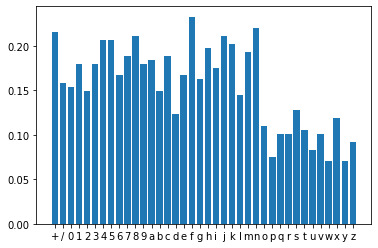

In [43]:
plt.bar(names,vec.transform(crypt_aes)[0].data)

### **AES Embedding score**

<BarContainer object of 38 artists>

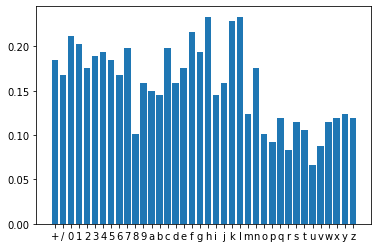

In [46]:
plt.bar(names,vec.transform(crypt_bf)[0].data)

### **DES3 Embedding score**

<BarContainer object of 38 artists>

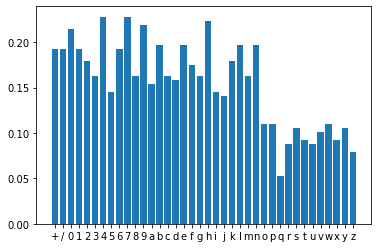

In [49]:
plt.bar(names,vec.transform(crypt_des3)[0].data)

## **SVM**

In [32]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [115]:
clf = make_pipeline(StandardScaler(with_mean=False), SVC(kernel='linear', C=1, decision_function_shape='ovo',max_iter=-1))

In [34]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovo', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [35]:
pre=clf.predict(x_train)

In [36]:
a=0
for i in range(2000):
    if pre[i]==y_train[i]:
      a=a+1
print("Train set accuracy : ",a/20 ,"%") 

Train set accuracy :  48.6 %


In [37]:
pred=clf.predict(x_val)

In [38]:
a=0
for i in range(1000):
    if pred[i]==y_val[2000+i]:
      a=a+1
print("Validation set accuracy : ",a/10 ,"%")

Validation set accuracy :  44.0 %


# **Histograms Approach**

### **Plain Text**

In [40]:
x[0]

'thefultoncountygrandjurysaidfridayaninvestigationofatlantasrecentprimaryelectionproducednoevidencethatanyirregularitiestookplacethejuryfurthersaidintermendpresentmentsthatthecityexecutivecommitteewhichhadoverallchargeoftheelectiondeservesthepraiseandthanksofthecityofatlantaforthemannerinwhichtheelectionwasconductedtheseptemberoctobertermjuryhadbeenchargedbyfultonsuperiorcourtjudgedurwoodpyetoinvestigatereportsofpossibleirregularitiesinthehardfoughtprimarywhichwaswonbymayornominateivanallenjronlyarelativehandfulofsuchreportswasreceivedthejurysaidconsideringthewidespreadinterestintheelectionthenumberofvotersandthesizeofthiscitythejurysaiditdidfindthatmanyofgeorgiasregistrationandelectionlawsareoutmodedorinadequateandoftenambiguousitrecommendedthatfultonlegislatorsacttohavetheselawsstudiedandrevisedtotheendofmodernizingandimprovingthemthegrandjurycommentedonanumberofothertopicsamongthemtheatlantaandfultoncountypurchasingdepartmentswhichitsaidarewelloperatedandfollowgenerallyacceptedpract

## **Histograms**

### **Blowfish Histogram**

In [44]:
p=bytes(crypt_bf[0], 'utf-8')
l=[]
for i in range(len(p)):
  l.append(p[i])

print(l)

[56, 119, 75, 116, 43, 72, 78, 88, 120, 102, 110, 109, 100, 122, 85, 113, 49, 113, 66, 52, 106, 66, 84, 87, 111, 99, 79, 112, 107, 110, 109, 77, 105, 51, 111, 84, 121, 49, 76, 71, 109, 81, 68, 66, 121, 88, 43, 98, 83, 47, 97, 89, 89, 84, 116, 70, 118, 43, 74, 53, 111, 116, 104, 68, 118, 88, 119, 120, 116, 84, 83, 48, 65, 55, 117, 67, 68, 78, 79, 77, 81, 101, 99, 88, 70, 50, 119, 72, 105, 103, 57, 80, 87, 83, 69, 113, 103, 53, 47, 118, 65, 50, 55, 85, 68, 78, 117, 109, 106, 48, 100, 90, 105, 100, 65, 113, 73, 82, 73, 108, 52, 87, 117, 97, 68, 122, 101, 108, 109, 49, 70, 99, 108, 109, 50, 55, 115, 85, 48, 82, 89, 43, 82, 108, 99, 121, 87, 106, 100, 97, 84, 53, 118, 81, 105, 113, 54, 51, 110, 121, 54, 108, 56, 121, 57, 73, 117, 51, 104, 99, 118, 105, 67, 43, 47, 102, 85, 53, 116, 89, 100, 100, 52, 79, 78, 87, 100, 106, 111, 70, 84, 116, 47, 50, 108, 78, 47, 119, 48, 69, 110, 55, 84, 87, 105, 101, 117, 119, 103, 66, 55, 104, 67, 105, 49, 69, 56, 111, 106, 106, 47, 109, 49, 47, 81, 52, 43, 

<BarContainer object of 1344 artists>

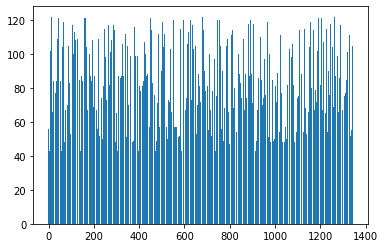

In [45]:
plt.bar(range(len(bytes(crypt_bf[0], 'utf-8'))),l)

### **AES Histogram**

In [47]:

p=bytes(crypt_aes[0], 'utf-8')
l=[]
for i in range(len(p)):
  l.append(p[i])

print(l)

[56, 52, 70, 122, 112, 67, 52, 102, 118, 79, 56, 88, 97, 121, 109, 100, 99, 43, 105, 74, 98, 103, 56, 100, 90, 75, 88, 47, 116, 54, 54, 43, 65, 121, 115, 120, 108, 70, 117, 122, 43, 68, 90, 43, 56, 89, 51, 65, 105, 120, 57, 80, 87, 70, 115, 102, 106, 115, 97, 113, 115, 50, 50, 78, 84, 72, 55, 68, 87, 116, 87, 51, 73, 75, 57, 109, 108, 99, 53, 115, 90, 83, 100, 66, 75, 98, 115, 75, 118, 71, 82, 68, 51, 53, 111, 50, 112, 79, 116, 115, 80, 86, 102, 69, 80, 51, 85, 69, 80, 85, 99, 100, 99, 97, 79, 53, 66, 113, 66, 51, 65, 52, 72, 121, 107, 76, 90, 106, 72, 57, 109, 110, 66, 119, 89, 110, 70, 54, 49, 120, 109, 105, 119, 89, 89, 112, 100, 74, 66, 113, 85, 117, 74, 118, 119, 50, 57, 104, 108, 114, 78, 48, 117, 70, 68, 52, 105, 100, 101, 116, 112, 51, 71, 83, 106, 90, 48, 106, 65, 78, 43, 47, 120, 112, 43, 77, 87, 97, 114, 121, 53, 119, 119, 83, 107, 102, 108, 80, 81, 82, 97, 50, 108, 103, 98, 101, 78, 116, 97, 107, 82, 77, 114, 66, 90, 52, 102, 101, 85, 73, 106, 99, 105, 108, 114, 113, 55, 52

<BarContainer object of 1344 artists>

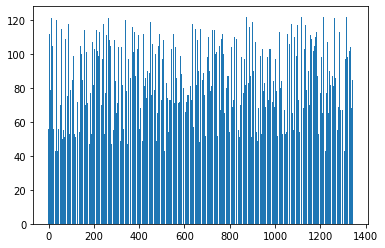

In [48]:
plt.bar(range(len(bytes(crypt_aes[0], 'utf-8'))),l)

### **DES3 Histogram**

In [50]:
p=bytes(crypt_des3[0], 'utf-8')
l=[]
for i in range(len(p)):
  l.append(p[i])

print(l)

[116, 53, 102, 90, 115, 88, 89, 69, 66, 74, 116, 97, 50, 80, 78, 103, 104, 74, 121, 82, 85, 87, 85, 74, 81, 82, 99, 109, 78, 79, 49, 103, 102, 116, 49, 65, 90, 117, 106, 72, 52, 103, 90, 73, 79, 53, 108, 48, 108, 90, 79, 99, 121, 75, 77, 87, 69, 82, 88, 81, 117, 51, 84, 97, 71, 68, 71, 48, 81, 57, 116, 49, 82, 70, 81, 100, 103, 105, 75, 121, 70, 100, 74, 77, 75, 83, 116, 65, 98, 99, 101, 51, 50, 66, 54, 87, 100, 118, 121, 109, 81, 72, 89, 78, 103, 80, 72, 65, 48, 103, 105, 87, 72, 97, 43, 57, 56, 84, 69, 71, 84, 84, 66, 53, 101, 101, 84, 78, 69, 114, 120, 53, 98, 88, 66, 97, 73, 69, 99, 80, 68, 90, 110, 114, 80, 83, 54, 65, 74, 102, 77, 122, 80, 48, 67, 48, 76, 105, 47, 54, 112, 106, 79, 87, 78, 113, 113, 66, 43, 70, 54, 49, 57, 82, 79, 97, 90, 53, 82, 102, 82, 109, 111, 86, 53, 109, 84, 81, 112, 104, 101, 90, 79, 79, 107, 100, 113, 103, 88, 53, 73, 98, 99, 109, 67, 53, 75, 55, 78, 105, 116, 112, 71, 57, 54, 52, 90, 54, 71, 50, 48, 83, 83, 52, 101, 117, 108, 75, 106, 49, 69, 106, 57, 5

<BarContainer object of 1344 artists>

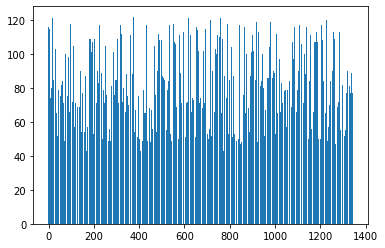

In [51]:
plt.bar(range(len(bytes(crypt_des3[0], 'utf-8'))),l)

## **Cipher Text to Byte Histograms**

list l1 = float representation of each character of cipher text

In [109]:
l1=[]
for i in range(3000):
  l2=[]
  x=bytes(df2["Cryptic data"][i], 'utf-8')
  for j in range(len(df2["Cryptic data"][0])):
    
    l2.append(float(x[j]))
  l1.append(l2)    




In [121]:
print("Cryptic Data string representation : ",df2["Cryptic data"][0] )
print("Lenght of string representation : ",len(df2["Cryptic data"][0]))
print(" ")
print("Cryptic Data byte representation  : ",l1[0] )
print("Lenght of byte list : ",len(l1[0]))

Cryptic Data string representation :  7vHf5w0LTfPNyg7qJiWsVDe1mOUkONrnanyf6/7hDzHBjylJG8hoqCHNaRzL68fEnhl/HGMrVXbvllf1AZ7WTi1J/mMEQsy8JiM6jrSWgKQ28osYAHtcMDP5BwWiL4MuXIZ6hBmDmlUgLTW+hd9nqT/PnvkhjkhB+XUIl9ESBKWPUsb4t21+e1MQEz3+v9xupLK7qhW8wei2aBt5iGPIJt3mhYxo1k4G5Xdd0LR62o0vCkBFEZg2OwzIUNvqRPSeXSjqJzwreI4fa5miRg85UucMYoFcXXi2y/NPt05TaY/I0HtfalA1I6gfdoC8A/j4mukdkZWCMVrm1lQJSNc1nR/wl7jbWpJfdtR/zxQtmwGxARHMpf4RntgsGZMRFJIYZ3dy2PyvcJihQO8F/zZzVTVIFH2uLziV5oUjxMqEysuh8k3a1GZ0k/M1k1Xauoi4vmUmwCRLWSL1jOfe7D1JHJ/yB9xclWuqamvs1/YEaX6rNe4gu8Pzt5FZn2thilCImwHld8Y2buV9FGvEfxQm0Ib6ySi1ZNyZKFjSTDAavejS1IbfEMWioaYtdJ+X4ZviU0QdHjScBZL0opXfXElWg70UzNnLH5zb3yrlIsDxwAsg3wfw5cRxRColUPwvspTc1xqSvhq71pmfuuyZYxkB8YT+25tkc6iK6bdUHmhOFNH6OCjyUyVFxXszRe/iFqHwPJlL1es6n5uuw6nC79TzzhGDCHah/bGa3pvONi4Mq36VOps9Lt9JMNehPcmQid2dhK5HY3KWNdoH2e+MWd0VDDH8u5rp/uVuQXcHy/dRiTvyUgWaL0tnFF/l3JZg0RoTXvJUo0jqekkWZPIMzBob3yzm4fZBSeR0xVlZCMuR21Ks3EqHLe0MkIRMrd0vq8jiJ4zsbGfghoEURdHR6Dy0DiLwLfoUBaLz4pKBSFx0fRQo6NdUPefAHJDUI3cloxdPPE

## **SVM**

In [123]:
clf_svm = make_pipeline(StandardScaler(with_mean=False), SVC(kernel='linear', C=1, decision_function_shape='ovo',max_iter=-1))

In [124]:
clf_svm.fit(l1[0:2000],y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovo', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [127]:
pred=clf_svm.predict(l1[0:2000])

In [129]:
a=0
for i in range(2000):
    if pred[i]==y_train[i]:
      a=a+1
print("Train set accuracy : ",a/20 ,"%") 

Train set accuracy :  100.0 %


In [130]:
pred_val=clf_svm.predict(l1[2000:3000])

In [132]:
a=0
for i in range(1000):
    if pred_val[i]==y_val[2000+i]:
      a=a+1
print("Validation set accuracy : ",a/10 ,"%") 

Validation set accuracy :  91.0 %


## **Random Forest Classifier**

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
clf_rfc = RandomForestClassifier(max_depth=3, random_state=0,n_estimators=100)

In [150]:
clf_rfc.fit(l1[0:2000],y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [151]:
pred=clf_rfc.predict(l1[0:2000])

In [152]:
a=0
for i in range(2000):
    if pred[i]==y_train[i]:
      a=a+1
print("Train set accuracy : ",a/20 ,"%") 

Train set accuracy :  99.75 %


In [153]:
pre=clf_rfc.predict(l1[2000:3000])

In [154]:
a=0
for i in range(1000):
    if pre[i]==y_val[i+2000]:
      a=a+1
print("Validation set accuracy : ",a/10 ,"%") 

Validation set accuracy :  99.2 %
